# 1. 라이브러리 설치

In [3]:
! pip list

Package            Version
------------------ ------------
asttokens          2.4.1
certifi            2024.8.30
charset-normalizer 3.4.0
colorama           0.4.6
coloredlogs        15.0.1
comm               0.2.2
contourpy          1.3.1
cycler             0.12.1
debugpy            1.8.7
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
filelock           3.16.1
flatbuffers        24.12.23
fonttools          4.54.1
fsspec             2024.10.0
humanfriendly      10.0
idna               3.10
importlib_metadata 8.5.0
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.1
Jinja2             3.1.4
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mpmath             1.3.0
nest-asyncio       1.6.0
networkx           3.4.2
numpy              1.26.4
onnx               1.17.0
onnxruntime-gpu    1.20.1
opencv-python      4.10.0.84
packaging         

In [1]:
! pip install onnx

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ------------------------------- -------- 11.5/14.5 MB 55.5 MB/s eta 0:00:01
   ---------------------------------------- 14.5/14.5 MB 53.6 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.0 requires absl-py>=1.0.0, which is not installed.
tensorflow-gpu 2.10.0 requires astunparse>=1.6.0, which is not installed.
tensorflow-gpu 2.10.0 requires flatbuffers>=2.0, which is not installed.
tensorflow-gpu 2.10.0 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow-gpu 2.10.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.10.0 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow-gpu 2.10.0 requires h5py>=2.9.0, which is not installed.
tensorflow-gpu 2.10.0 requires keras<2.11,>=2.10.0, which is not installed.
tensorflow-gpu 2.10.0 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow-gpu 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow-gpu 2.10.0 requires opt-einsum>=2.3.2, which is not installed.
tenso

In [2]:
! pip install --upgrade onnxruntime-gpu

   ---------------------------------------- 0.0/279.7 MB ? eta -:--:--
   - -------------------------------------- 11.3/279.7 MB 54.2 MB/s eta 0:00:05
   --- ------------------------------------ 23.6/279.7 MB 57.5 MB/s eta 0:00:05
   ----- ---------------------------------- 35.7/279.7 MB 56.6 MB/s eta 0:00:05
   ------ --------------------------------- 47.7/279.7 MB 56.2 MB/s eta 0:00:05
   ------- -------------------------------- 55.3/279.7 MB 52.6 MB/s eta 0:00:05
   --------- ------------------------------ 64.7/279.7 MB 50.9 MB/s eta 0:00:05
   ---------- ----------------------------- 76.8/279.7 MB 52.1 MB/s eta 0:00:04
   ----------- ---------------------------- 78.9/279.7 MB 48.4 MB/s eta 0:00:05
   ----------- ---------------------------- 82.3/279.7 MB 43.4 MB/s eta 0:00:05
   ------------- -------------------------- 94.6/279.7 MB 44.7 MB/s eta 0:00:05
   -------------- ------------------------ 107.0/279.7 MB 45.8 MB/s eta 0:00:04
   --------------- ----------------------- 113.8/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.0 requires absl-py>=1.0.0, which is not installed.
tensorflow-gpu 2.10.0 requires astunparse>=1.6.0, which is not installed.
tensorflow-gpu 2.10.0 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow-gpu 2.10.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.10.0 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow-gpu 2.10.0 requires h5py>=2.9.0, which is not installed.
tensorflow-gpu 2.10.0 requires keras<2.11,>=2.10.0, which is not installed.
tensorflow-gpu 2.10.0 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow-gpu 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow-gpu 2.10.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow-gpu 2.10.0 requires tensorboard<2.11,>=2.10, which is not installed

# 2. Fine-tuning (추가 학습)

In [ ]:
# 폴더 디렉토리 구조
# 현재 폴더/
#   ├─ Train/
#   │   ├─ Fake/
#   │   └─ Real/
#   ├─ Validation/
#   │   ├─ Fake/
#   │   └─ Real/
#   ├─ Test/
#   │   ├─ Fake/
#   │   └─ Real/
#   ├─ onnx_fine_tuning_s128.ipynb  (본 예시 코드)
#   ├─ 학습된 모델 파일.pth  (본 예시 코드에서 생성)
#   └─ 학습된 모델 파일.onnx  (본 예시 코드에서 생성)

In [4]:
import torch
import torchvision

print(f"PyTorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"Is CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

PyTorch version: 2.5.1+cu121
torchvision version: 0.20.1+cu121
Is CUDA available: True
NVIDIA GeForce RTX 4070 Ti SUPER


In [1]:
import torch
import torchvision.models as models
import torch.nn as nn
import time
import torch.backends.cudnn as cudnn

# -------------------------------------
# 0) device 설정
# -------------------------------------
cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------------
# 1) 모델 선언 및 마지막 레이어 교체
# -------------------------------------
model = models.efficientnet_b0(pretrained=True)  # ImageNet 사전학습
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 2)  # binary class (Fake, Real)

# -------------------------------------
# 2) 데이터 로더 설정
# -------------------------------------
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os

base_dir = os.getcwd()  # 현재 작업 디렉토리
train_dir = os.path.join(base_dir, 'Train')
val_dir   = os.path.join(base_dir, 'Validation')
test_dir  = os.path.join(base_dir, 'Test')

batch = 16
img_resized = (128, 128)

train_transform = transforms.Compose([
    transforms.Resize(img_resized),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(img_resized),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset   = datasets.ImageFolder(root=val_dir, transform=test_transform)
test_dataset  = datasets.ImageFolder(root=test_dir, transform=test_transform)

# num_workers=0 == 메인 프로세스에서만 데이터를 로드하도록 함, CPU 코어 수 x (0.5 to 1.0) 로 설정 권장
# pin_memory=True == 데이터를 GPU로 전송할 때 복사를 사용
train_loader  = DataLoader(train_dataset, batch_size=batch, shuffle=True,  num_workers=8, pin_memory=True)
val_loader    = DataLoader(val_dataset,   batch_size=batch, shuffle=False, num_workers=8, pin_memory=True)
test_loader   = DataLoader(test_dataset,  batch_size=batch, shuffle=False, num_workers=8, pin_memory=True)

# 클래스 인덱스 확인
print("Train Dataset class to index mapping:")
print(train_dataset.class_to_idx)


c:\Users\user\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\user/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 56.0MB/s]


Train Dataset class to index mapping:
{'Fake': 0, 'Real': 1}


Epoch 1/50 - Training: 100%|██████████| 8925/8925 [02:48<00:00, 53.04it/s]


Validation loss decreased (inf --> 0.096443).  Saving model ...
Epoch [1/50] Train Loss: 0.1108 Train Acc: 0.9566 | Val Loss: 0.0964 Val Acc: 0.9592 | Time: 198.81 sec



Epoch 2/50 - Training: 100%|██████████| 8925/8925 [02:29<00:00, 59.82it/s]


Validation loss decreased (0.096443 --> 0.066758).  Saving model ...
Epoch [2/50] Train Loss: 0.0532 Train Acc: 0.9802 | Val Loss: 0.0668 Val Acc: 0.9767 | Time: 176.63 sec



Epoch 3/50 - Training: 100%|██████████| 8925/8925 [02:12<00:00, 67.12it/s]


Validation loss decreased (0.066758 --> 0.056911).  Saving model ...
Epoch [3/50] Train Loss: 0.0401 Train Acc: 0.9844 | Val Loss: 0.0569 Val Acc: 0.9795 | Time: 156.56 sec



Epoch 4/50 - Training: 100%|██████████| 8925/8925 [02:21<00:00, 63.07it/s]


EarlyStopping counter: 1 out of 5
Epoch [4/50] Train Loss: 0.0323 Train Acc: 0.9874 | Val Loss: 0.0579 Val Acc: 0.9800 | Time: 171.80 sec



Epoch 5/50 - Training: 100%|██████████| 8925/8925 [02:57<00:00, 50.23it/s]


Validation loss decreased (0.056911 --> 0.053879).  Saving model ...
Epoch [5/50] Train Loss: 0.0273 Train Acc: 0.9895 | Val Loss: 0.0539 Val Acc: 0.9816 | Time: 204.62 sec



Epoch 6/50 - Training: 100%|██████████| 8925/8925 [02:33<00:00, 58.07it/s]


EarlyStopping counter: 1 out of 5
Epoch [6/50] Train Loss: 0.0228 Train Acc: 0.9910 | Val Loss: 0.0730 Val Acc: 0.9774 | Time: 180.88 sec



Epoch 7/50 - Training: 100%|██████████| 8925/8925 [02:34<00:00, 57.80it/s]


EarlyStopping counter: 2 out of 5
Epoch [7/50] Train Loss: 0.0200 Train Acc: 0.9921 | Val Loss: 0.0567 Val Acc: 0.9809 | Time: 181.30 sec



Epoch 8/50 - Training: 100%|██████████| 8925/8925 [02:34<00:00, 57.93it/s]


EarlyStopping counter: 3 out of 5
Epoch [8/50] Train Loss: 0.0177 Train Acc: 0.9930 | Val Loss: 0.0540 Val Acc: 0.9835 | Time: 181.12 sec



Epoch 9/50 - Training: 100%|██████████| 8925/8925 [02:34<00:00, 57.65it/s]


EarlyStopping counter: 4 out of 5
Epoch [9/50] Train Loss: 0.0164 Train Acc: 0.9935 | Val Loss: 0.0600 Val Acc: 0.9824 | Time: 181.80 sec



Epoch 10/50 - Training: 100%|██████████| 8925/8925 [02:34<00:00, 57.76it/s]


EarlyStopping counter: 5 out of 5
Epoch [10/50] Train Loss: 0.0142 Train Acc: 0.9945 | Val Loss: 0.0539 Val Acc: 0.9845 | Time: 181.42 sec

Early stopping triggered. Training stopped.
Total Training Time: 30.25 minutes


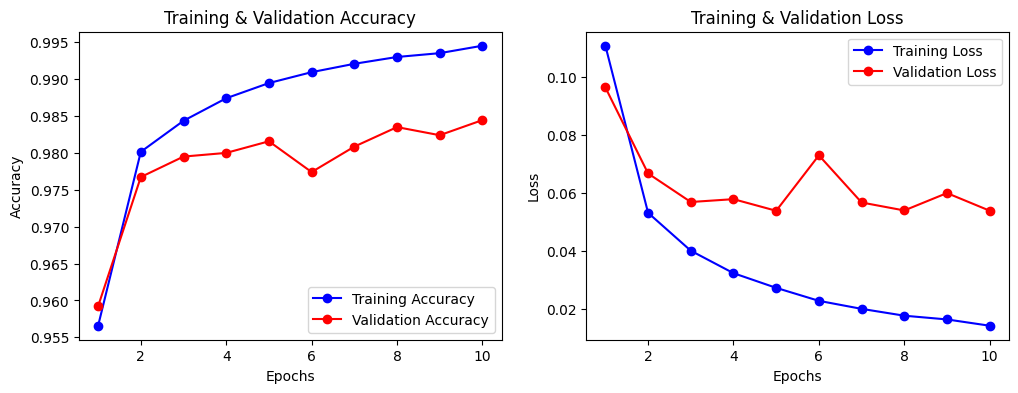

In [2]:

# -------------------------------------
# 3) 학습 설정 (Loss, Optimizer 등)
# -------------------------------------
import torch.optim as optim

model = model.to(device)  # 모델을 device(GPU/CPU)에 올림
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 50

# -------------------------------------
# 4) EarlyStopping 클래스 정의
# -------------------------------------
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='best_model.pth'):
        """
        Args:
            patience (int): 개선이 없을 때 기다릴 에포크 수
            verbose (bool): 상세 로그 출력 여부
            delta (float): 개선의 최소 변화량
            path (str): 최적 모델을 저장할 경로
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')

    def __call__(self, val_loss, model):
        score = -val_loss  # 검증 손실이 낮을수록 좋으므로 음수로 변환

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """검증 손실이 감소하면 모델을 저장"""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

# -------------------------------------
# 5) Early Stopping 인스턴스 생성
# -------------------------------------
early_stopping = EarlyStopping(patience=5, verbose=True, path='best_model.pth')

# -------------------------------------
# 6) Training Loop with Early Stopping
# -------------------------------------
import matplotlib.pyplot as plt
from tqdm import tqdm

train_acc_history = []
train_loss_history = []
val_acc_history = []
val_loss_history = []

total_start_time = time.time()

for epoch in range(num_epochs):
    start_time = time.time()  # 에포크 시작 시간 기록
    
    # -----------------
    # Train Loop
    # -----------------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc  = correct / total
    
    train_acc_history.append(epoch_acc)
    train_loss_history.append(epoch_loss)

    # -----------------
    # Validation Loop
    # -----------------
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            v_loss = criterion(val_outputs, val_labels)
            val_loss += v_loss.item() * val_images.size(0)
            _, v_preds = torch.max(val_outputs, 1)
            val_correct += torch.sum(v_preds == val_labels).item()
            val_total += val_labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc  = val_correct / val_total
    
    val_acc_history.append(val_epoch_acc)
    val_loss_history.append(val_epoch_loss)

    # -----------------
    # Early Stopping 체크
    # -----------------
    early_stopping(val_epoch_loss, model)

    end_time = time.time()  # 에포크 종료 시간 기록
    epoch_duration = end_time - start_time  # 에포크 소요 시간 계산

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f} | "
          f"Val Loss: {val_epoch_loss:.4f} Val Acc: {val_epoch_acc:.4f} | "
          f"Time: {epoch_duration:.2f} sec\n")

    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break

total_end_time = time.time()
total_duration = total_end_time - total_start_time
print(f"Total Training Time: {total_duration/60:.2f} minutes")

# 모델 학습과정 그래프로 나타내기
epochs = range(1, len(train_acc_history) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(epochs, train_acc_history, 'bo-', label='Training Accuracy')
ax[0].plot(epochs, val_acc_history, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss_history, 'b-o', label='Training Loss')
ax[1].plot(epochs, val_loss_history, 'r-o', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

# -------------------------------------
# 7) Model Save
# -------------------------------------
# best_model.pth 에 이미 최적 모델이 저장되었으므로, 추가로 현재 모델 상태를 저장할 수 있습니다.
torch.save(model.state_dict(), "final_model.pth")


In [3]:

# -------------------------------------
# 8) Test
# -------------------------------------
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)

        _, preds = torch.max(outputs, 1)  
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

avg_loss = test_loss / total
accuracy = correct / total

print(f"[Test] Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")


C:\Users\user\AppData\Local\Temp\ipykernel_23188\1537564207.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


[Test] Loss: 0.3528, Accuracy: 0.9051


In [ ]:
# --------------------------------------------------
# (추가) 학습된 모델을 ONNX 포맷으로 내보내기
# --------------------------------------------------
import torch
import torchvision.models as models
import torch.nn as nn
import torch.onnx
import os

# base_dir = os.path.dirname(os.path.abspath(__file__))   # 현재 작업 디렉토리 (.py 파일과 같은 경로)
base_dir = os.getcwd()   # 현재 작업 디렉토리 (.ipynb 파일과 같은 경로)
pth_name = os.path.join(base_dir, "deepfake_binary_s128_e5_early.pth")

# 1) 모델 구조 생성 & 파라미터 로드
onnx_model = models.efficientnet_b0(pretrained=False)
num_features = onnx_model.classifier[1].in_features
onnx_model.classifier[1] = nn.Linear(num_features, 2)
onnx_model.load_state_dict(torch.load(pth_name, map_location="cpu"))
onnx_model.eval()

# 2) ONNX 변환
onnx_model_name = "deepfake_binary_s128_e5_early.onnx"

# (예시) 1개의 이미지(batch_size=1), 3채널, 128x128 크기
dummy_input = torch.randn(1, 3, 128, 128, device='cpu')

torch.onnx.export(
    onnx_model,
    dummy_input,
    onnx_model_name,
    input_names=["input"],        # ONNX 모델에 들어갈 입력 이름
    output_names=["output"],      # ONNX 모델에서 뽑을 출력 이름
    dynamic_axes={
        "input": {0: "batch_size"},
        "output": {0: "batch_size"}
    },
    opset_version=11,             # ONNX Opset 버전 (필요에 따라 변경)
    do_constant_folding=True      # 상수 폴딩 최적화
)

print(f"ONNX 모델 저장 완료: {onnx_model_name}")


C:\Users\user\AppData\Local\Temp\ipykernel_26788\1178175133.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  onnx_model.load_state_dict(torch.load(pth_name, map_location

ONNX 모델 저장 완료: deepfake_binary_s128_e5_early.onnx
